# QKD E91
Demonstração do protocolo E91.

In [1]:
# Dependências
from components import Network, Controller
from components.qkd.e91 import create_key, generate_bases, prepara_qubits_e91, aplly_bases_in_measurement_e91, compare_bases, get_key, check_key

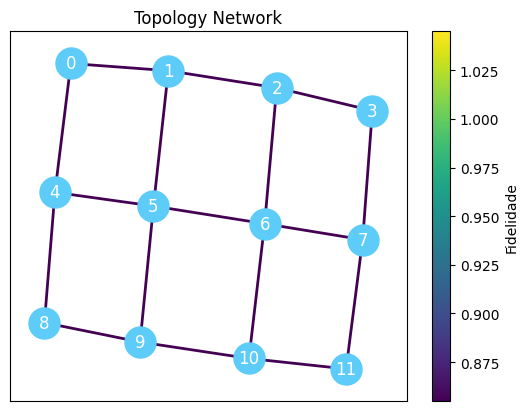

In [2]:
# Criando uma rede:
rede = Network()
# Definindo a topologia
rows = 3
cols = 4
rede.set_lattice_topology(rows, cols)

# Definindo um controlador
controlador = Controller(rede)

# Informações adicionais
num_mensagens = 10
key_size = 10

# Visualizando a topologia
rede.draw()

In [3]:
for key in range(num_mensagens):
    # Definindo Alice e Bob
    alice, bob = rede.random_alice_bob()
    
    # Informações para Alice
    key_alice = create_key(key_size)
    bases_alice = generate_bases(key_size)
    
    # Preparando os pares de Bell
    pairs = prepara_qubits_e91(key_alice, bases_alice)
    
    # Informações para Bob
    bases_bob = generate_bases(key_size)
    
    # Calculando a rota
    route = controlador.calculate_shortest_route(alice, bob)
    
    # Enviando os qubits
    received_qubits, interference_qubits = rede.send_eprs(route[0], pairs)
    
    # Bob medindo os qubits
    measured_qubits = aplly_bases_in_measurement_e91(received_qubits, bases_bob)
    
    # Comparando as bases de Alice e Bob
    matching_bases = compare_bases(bases_alice, bases_bob)
    
    # Chave obtida de acordo com as bases
    key_bob = get_key(measured_qubits, matching_bases)
    
    # Checando chave
    shared_key = check_key(key_bob, key_alice)
    
    # Print the results
    results = f"""
Base de Alice:          {bases_alice}
Base de Bob:            {bases_bob}
Chave gerada:           {key_alice}
Chave recebida:         {key_bob}
Qubits interferidos:    {interference_qubits}
Chave final:            {shared_key}
Bits diferentes:        {len(key_alice) - len(shared_key)}
Key sucess:             {len(shared_key) / key_size}
"""
    
    print(results)


Base de Alice:          [1, 1, 0, 1, 1, 1, 0, 1, 0, 0]
Base de Bob:            [1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
Chave gerada:           [0, 1, 1, 1, 1, 0, 1, 0, 1, 1]
Chave recebida:         [0, 1, None, 1, 0, 0, 1, 0, None, 1]
Qubits interferidos:    {8, 4}
Chave final:            [0, 1, 1, 0, 1, 0, 1]
Bits diferentes:        3
Key sucess:             0.7


Base de Alice:          [1, 1, 0, 1, 1, 1, 0, 0, 0, 0]
Base de Bob:            [1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
Chave gerada:           [1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
Chave recebida:         [1, None, 1, None, 1, None, 0, 1, 1, None]
Qubits interferidos:    set()
Chave final:            [1, 1, 1, 0, 1, 1]
Bits diferentes:        4
Key sucess:             0.6


Base de Alice:          [0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
Base de Bob:            [1, 0, 0, 0, 0, 1, 0, 1, 1, 1]
Chave gerada:           [1, 0, 1, 0, 1, 0, 0, 0, 1, 0]
Chave recebida:         [None, None, None, None, 1, None, None, 0, 1, 0]
Qubits interferidos:    set()
Chave final